In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
file_path ="..\data\IMDB Dataset.csv"

### reading data using pandas

In [3]:
df = pd.read_csv(file_path)
pd.set_option('display.max_colwidth', None)


### **Read top 5 data**

In [4]:
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",positive
freq,5,25000


In [7]:
df.shape

(50000, 2)

In [8]:
df.columns

Index(['review', 'sentiment'], dtype='object')

## To check for missing or null values in a dataset

In [9]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [10]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

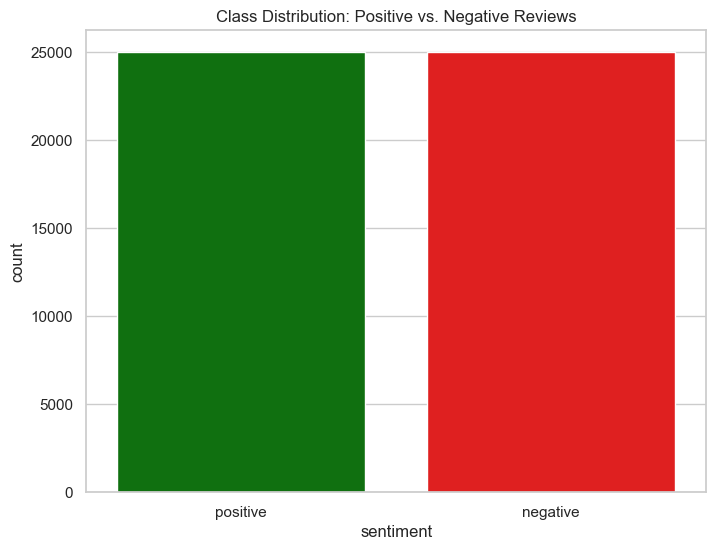

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette={'positive': 'green', 'negative': 'red'})
# Add a title to the plot for clarity.
plt.title('Class Distribution: Positive vs. Negative Reviews')

plt.show()

### Convert text to lowercase.

In [12]:
def lowercase(text):
    
    return text.lower()

In [13]:
df['review'] = df['review'].apply(lowercase)

In [14]:
df.head()

,review,sentiment
0,"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. forget pretty pictures painted for mainstream audiences, forget charm, forget romance...oz doesn't mess around. the first episode i ever saw struck me as so nasty it was surreal, i couldn't say i was ready for it, but as i watched more, i developed a taste for oz, and got accustomed to the high levels of graphic violence. not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) watching oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only ""has got all the polari"" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master's of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell's murals decorating every surface) are terribly well done.",positive
2,"i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.<br /><br />this was the most i'd laughed at one of woody's comedies in years (dare i say a decade?). while i've never been impressed with scarlet johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />this may not be the crown jewel of his career, but it was wittier than ""devil wears prada"" and more interesting than ""superman"" a great comedy to go see with friends.",positive
3,"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zom

### remove html tags and br tags or special characters

In [15]:
import re

def remove_html_tags(text):
    """Remove HTML tags from text."""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [16]:
df['review'] = df['review'].apply(remove_html_tags)

In [17]:
df.head()

,review,sentiment
0,"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. forget pretty pictures painted for mainstream audiences, forget charm, forget romance...oz doesn't mess around. the first episode i ever saw struck me as so nasty it was surreal, i couldn't say i was ready for it, but as i watched more, i developed a taste for oz, and got accustomed to the high levels of graphic violence. not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) watching oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only ""has got all the polari"" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master's of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell's murals decorating every surface) are terribly well done.",positive
2,"i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.this was the most i'd laughed at one of woody's comedies in years (dare i say a decade?). while i've never been impressed with scarlet johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.this may not be the crown jewel of his career, but it was wittier than ""devil wears prada"" and more interesting than ""superman"" a great comedy to go see with friends.",positive
3,"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a dra

In [18]:
# We define a function to encapsulate the punctuation removal logic.
def remove_punctuation(text):
    return re.sub(r'[^a-z0-9\s]', ' ', text).strip()

In [19]:
df['review'] = df['review'].apply(remove_punctuation)

In [20]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare forget pretty pictures painted for mainstream audiences forget charm forget romance oz doesn t mess around the first episode i ever saw struck me as so nasty it was surreal i couldn t say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards who ll be sold out for a nickel inmates who ll kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewing thats if you can get in touch with your darker side,positive
1,a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done,positive
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a light hearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to love this was the most i d laughed at one of woody s comedies in years dare i say a decade while i ve never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young woman this may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends,positive
3,basically there s a family where a little boy jake thinks there s a zombie in his closet his parents are fighting all the time this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombie ok first of all when you re going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his closet whic

In [21]:
from nltk.corpus import stopwords


In [22]:
english_stopwords_list = stopwords.words('english')
stop_words_set = set(english_stopwords_list)

In [23]:
def tokenize_and_remove_stopwords(text):
    """Tokenize text and remove stopwords."""
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words_set]
    return ' '.join(filtered_tokens)
df['review'] = df['review'].apply(tokenize_and_remove_stopwords)

In [24]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience watching oz may become comfortable uncomfortable viewing thats get touch darker side,positive
1,wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done,positive
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends,positive
3,basically family little boy jake thinks zombie closet parents fighting time movie slower soap opera suddenly jake decides become rambo kill zombie ok first going make film must decide thriller drama drama movie watchable parents divorcing arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller spots 3 10 well playing parents descent dialogs shots jake ignore,negative
4,petter mattei love time money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzler play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitat thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounter acting good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alive wish mr mattei good luck await anxiously next work,positive


### Lemmatization: Finding the Root of the Word

In [25]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [26]:
# Import the WordNetLemmatizer from the NLTK's 'stem' module
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [27]:
def lemmatize_tokens(tokens):
    """Lemmatize tokens in the text."""
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens.split()]
    return ' '.join(lemmatized_tokens)


In [28]:
df['review'] = df['review'].apply(lemmatize_tokens)
df.head(8)

,review,sentiment
0,one reviewer mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz may become comfortable uncomfortable viewing thats get touch darker side,positive
1,wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done,positive
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty character likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many u grown love laughed one woody comedy year dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wear prada interesting superman great comedy go see friend,positive
3,basically family little boy jake think zombie closet parent fighting time movie slower soap opera suddenly jake decides become rambo kill zombie ok first going make film must decide thriller drama drama movie watchable parent divorcing arguing like real life jake closet totally ruin film expected see boogeyman similar movie instead watched drama meaningless thriller spot 3 10 well playing parent descent dialog shot jake ignore,negative
4,petter mattei love time money visually stunning film watch mr mattei offer u vivid portrait human relation movie seems telling u money power success people different situation encounter variation arthur schnitzler play theme director transfer action present time new york different character meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitat thing one get soul picture different stage loneliness one inhabits big city exactly best place human relation find sincere fulfillment one discerns case people encounter acting good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make character come alive wish mr mattei good luck await anxiously next work,positive
5,probably time favorite movie story selflessness sacrifice dedication noble cause preachy boring never get old despite seen 15 time last 25 year paul lukas performance brings tear eye bette davis one truly sympathetic role delight kid grandma say like dressed midget child make fun watch mother slow awakening happening world roof believable startling dozen thumb movie,p

In [29]:
def join_tokens(tokens):
    """Join tokens into a single string."""
    return ' '.join(tokens.split())

In [30]:
df['cleaned_review'] = df['review'].apply(join_tokens)

df[['review', 'cleaned_review', 'sentiment']].head()

,review,cleaned_review,sentiment
0,one reviewer mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz may become comfortable uncomfortable viewing thats get touch darker side,one reviewer mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz may become comfortable uncomfortable viewing thats get touch darker side,positive
1,wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done,wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done,positive
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty character likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many u grown love laughed one woody comedy year dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wear

In [31]:
X = df['cleaned_review']
y = df['sentiment']

In [32]:
print("--- Features (X) ---")
print(X.head())
print("\n" + "="*50 + "\n") # A clean separator
print("--- Target (y) ---")
print(y.head())

--- Features (X) ---
0    one reviewer mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill pris

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
print("TfidfVectorizer initialized successfully:")
print(tfidf_vectorizer)

TfidfVectorizer initialized successfully:
TfidfVectorizer(max_features=10000)


In [37]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [38]:
# First, let's check the shape of our training data matrix.
print("Shape of the TF-IDF training data matrix (X_train_tfidf):", X_train_tfidf.shape)

# Next, we check the shape of our testing data matrix.
print("Shape of the TF-IDF testing data matrix (X_test_tfidf):", X_test_tfidf.shape)

Shape of the TF-IDF training data matrix (X_train_tfidf): (40000, 10000)
Shape of the TF-IDF testing data matrix (X_test_tfidf): (10000, 10000)


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)

In [41]:
lr_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [42]:
lr_model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [43]:
y_pred = lr_model.predict(X_test_tfidf)

In [44]:
print(y_pred[:20])  # Display the first 20 predictions

['negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'positive'
 'positive' 'negative' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive']


In [45]:
from sklearn.metrics import classification_report, confusion_matrix


In [46]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [47]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[4417  583]
 [ 474 4526]]


### Create heatmap for visvallization purpose

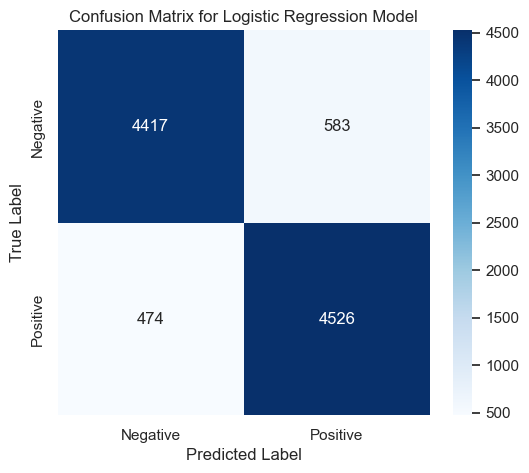

In [48]:
class_names = ['Negative', 'Positive']
plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')

# Add labels and a title for clarity.
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')

# Display the plot.
plt.show()

In [49]:
import joblib

In [50]:
model_filename = 'lr_model.pkl'
joblib.dump(lr_model, model_filename)
print(f"Model saved successfully to '{model_filename}'")

Model saved successfully to 'lr_model.pkl'


In [51]:
!pip install tensorflow

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [53]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [54]:
from tensorflow.keras.models import Sequential

In [55]:
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [56]:
VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
print(f"The tokenizer has learned a vocabulary of {len(tokenizer.word_index)} words.")

# Let's see the mapping for a few common words.
print("\nExample word-to-index mappings:")
print(f"movie -> {tokenizer.word_index.get('movie')}")
print(f"film -> {tokenizer.word_index.get('film')}")
print(f"good -> {tokenizer.word_index.get('good')}")
print(f"bad -> {tokenizer.word_index.get('bad')}")

The tokenizer has learned a vocabulary of 84780 words.

Example word-to-index mappings:
movie -> 2
film -> 3
good -> 7
bad -> 19


In [57]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
print("--- Original Text Review (from X_train) ---")

print(X_train.iloc[0])

# ...and now let's see its corresponding integer sequence.
print("\n--- Same Review Converted to an Integer Sequence ---")
print(X_train_sequences[0])

--- Original Text Review (from X_train) ---
caught little gem totally accident back 1980 81 revival theatre see two old silly sci fi movie theatre packed full warning showed bunch sci fi short spoof get u mood somewhat amusing came within second audience hysteric biggest laugh came showed princess laia huge cinnamon bun instead hair head look camera give grim smile nod made even funnier gotta see chewabacca played look like muppet extremely silly stupid stop laughing dialogue drowned laughter also know star war pretty well even funnier deliberately poke fun dialogue really work audience definite 10

--- Same Review Converted to an Integer Sequence ---
[918, 47, 1150, 352, 1368, 61, 2537, 1, 7854, 1317, 13, 35, 70, 543, 735, 728, 2, 1317, 2591, 258, 1494, 1116, 622, 735, 728, 215, 1917, 12, 75, 1035, 540, 997, 280, 625, 190, 156, 1, 978, 206, 280, 1116, 2489, 1, 521, 1, 1, 198, 963, 248, 44, 231, 60, 2990, 1444, 3709, 27, 10, 2490, 2971, 13, 1, 161, 44, 5, 4018, 462, 543, 260, 382, 892,

In [58]:
print("\n--- Verifying Sequence Lengths ---")
print(f"Length of first training sequence: {len(X_train_sequences[0])}")
print(f"Length of second training sequence: {len(X_train_sequences[1])}")
print(f"Length of first testing sequence: {len(X_test_sequences[0])}")


--- Verifying Sequence Lengths ---
Length of first training sequence: 90
Length of second training sequence: 88
Length of first testing sequence: 70


In [59]:
MAX_LEN = 200
X_train_padded = pad_sequences(X_train_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_LEN, padding='post', truncating='post')

# Let's verify the result. The .shape attribute will show us the new dimensions of our data.
print("--- Shape of Padded Data ---")
print("Shape of X_train_padded:", X_train_padded.shape)
print("Shape of X_test_padded:", X_test_padded.shape)

# Let's also look at the first padded sequence to see what it looks like.
# Compare this to the original sequence from the previous task. You'll see the trail of zeros.
print("\n--- Example of a Padded Sequence (from X_train_padded) ---")
print(X_train_padded[0])

--- Shape of Padded Data ---
Shape of X_train_padded: (40000, 200)
Shape of X_test_padded: (10000, 200)

--- Example of a Padded Sequence (from X_train_padded) ---
[ 918   47 1150  352 1368   61 2537    1 7854 1317   13   35   70  543
  735  728    2 1317 2591  258 1494 1116  622  735  728  215 1917   12
   75 1035  540  997  280  625  190  156    1  978  206  280 1116 2489
    1  521    1    1  198  963  248   44  231   60 2990 1444 3709   27
   10 2490 2971   13    1  161   44    5 4018  462  543  260  382  892
  284 7778 1936   22   32   94  165   93   17   10 2490 3965 5607  147
  284   15   53  156 3315   74    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0

In [60]:
# We can create a simple mapping dictionary.
label_mapping = {'positive': 1, 'negative': 0}

# We use the .map() method from Pandas to apply this transformation.
y_train_final = y_train.map(label_mapping)
y_test_final = y_test.map(label_mapping)

# Let's check the first 5 values of the converted training labels to confirm.
print("\n--- Converted Numerical Labels (from y_train_final) ---")
print(y_train_final.head())


--- Converted Numerical Labels (from y_train_final) ---
47808    1
20154    0
43069    0
19413    0
13673    0
Name: sentiment, dtype: int64


In [61]:

# Let's also define the dimensionality for our word embeddings and LSTM units.
EMBEDDING_DIM = 128
LSTM_UNITS = 64

# 1. Initialize the Sequential model
# This creates an empty, linear stack of layers to which we will add our components.
model = Sequential()

# 2. Add the Embedding Layer
# This is the first layer of our network. It's responsible for turning our integer-encoded
# reviews into dense vectors of a fixed size.
# - input_dim=VOCAB_SIZE: The size of our vocabulary (10,000). This tells the layer how many
#   unique word vectors it needs to learn.
# - output_dim=EMBEDDING_DIM: The dimension of the dense embedding for each word. Each word will
#   be represented by a 128-dimensional vector.
# - input_length=MAX_LEN: The length of our input sequences (200). This tells the layer
#   what size input to expect.
model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN))

# 3. Add the LSTM Layer
# This is the heart of our model. It processes the sequence of word vectors from the
# Embedding layer to learn context and sequential patterns.
# - units=LSTM_UNITS: The number of LSTM units in the layer (64). This is a key
#   hyperparameter that defines the representational capacity of the layer.
# - dropout=0.2: A regularization technique. During training, it will randomly set 20% of
#   the input units to 0 at each update step, which helps prevent overfitting.
# - recurrent_dropout=0.2: Another regularization technique, applied to the connections
#   between recurrent steps. It also helps prevent overfitting, which is common in LSTMs.
model.add(LSTM(units=LSTM_UNITS, dropout=0.2, recurrent_dropout=0.2))

# 4. Add the Dense Output Layer
# This is the final layer that makes the prediction. It takes the output from the LSTM
# layer and produces the final probability.
# - units=1: We want a single output neuron because this is a binary classification
#   (positive/negative). This neuron's output will be our prediction.
# - activation='sigmoid': This is the crucial activation function for binary classification.
#   It squashes the output of the neuron into a value between 0 and 1, which we can
#   interpret as the probability of the review being 'positive'.
model.add(Dense(units=1, activation='sigmoid'))

# Now that the model is defined, let's look at its structure.
# The .summary() method provides a clean, tabular view of our model's architecture,
# including the output shape and number of trainable parameters for each layer.
model.build(input_shape=(None, MAX_LEN))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
VOCAB_SIZE = 10000  # From our Tokenizer
MAX_LEN = 200       # From our padding step
EMBEDDING_DIM = 128 # A common choice for embedding vector size
# This creates an empty, linear stack of layers.
model = Sequential()

# Add the Embedding layer as the first layer in our network.
# This layer will transform our sequences of integer IDs into sequences of dense vectors.
model.add(Embedding(
   
    input_dim=VOCAB_SIZE,

    output_dim=EMBEDDING_DIM,

    # input_length: This is crucial for the first layer. It tells the model the exact
    # length of each input sequence it will receive. For us, this is the MAX_LEN (200)
    # we defined during padding.
    input_length=MAX_LEN
))
print("Model summary after adding the Embedding layer:")
model.build(input_shape=(None, MAX_LEN))
model.summary()

Model summary after adding the Embedding layer:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,000 (4.88 MB)

 Trainable params: 1,280,000 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:

VOCAB_SIZE = 10000
MAX_LEN = 200
EMBEDDING_DIM = 128
LSTM_UNITS = 64 # A new hyperparameter for our LSTM layer

# Re-initialize the model and add the Embedding layer from the previous step for context.
model = Sequential()
model.add(Embedding(
    input_dim=VOCAB_SIZE,
    output_dim=EMBEDDING_DIM,
    input_length=MAX_LEN
))

# --- NEW CODE FOR THIS TASK ---
# Now, we add the LSTM layer. This is the core of our recurrent network.
model.add(LSTM(
   
    units=LSTM_UNITS,

    # dropout: This is a regularization technique that randomly sets a fraction of the
    dropout=0.2,

    recurrent_dropout=0.2
))

# Let's check our model's architecture again with the new layer added.
print("Model summary after adding the LSTM layer:")
model.build(input_shape=(None, MAX_LEN))
model.summary()

Model summary after adding the LSTM layer:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,408 (5.07 MB)

 Trainable params: 1,329,408 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# We'll continue building on the 'model' object from the previous tasks.
# Let's re-state our hyperparameters for clarity.
VOCAB_SIZE = 10000
MAX_LEN = 200
EMBEDDING_DIM = 128
LSTM_UNITS = 64

# Re-initialize the model and add the previous layers for context.
model = Sequential()
model.add(Embedding(
    input_dim=VOCAB_SIZE,
    output_dim=EMBEDDING_DIM,
    input_length=MAX_LEN
))
model.add(LSTM(
    units=LSTM_UNITS,
    dropout=0.2,
    recurrent_dropout=0.2
))

# --- NEW CODE FOR THIS TASK ---
# Now, we add the final Dense layer. This is our classifier.
model.add(Dense(
   
    units=1,
    activation='sigmoid'
))

# Let's look at the complete architecture of our model.
print("Final model summary:")
model.build(input_shape=(None, MAX_LEN))
model.summary()

Final model summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(

    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# After compiling, we can print the summary again. The architecture is unchanged,
# but this confirms our model object is fully configured and ready for the next step.
print("Model has been successfully compiled and is ready for training.")
model.build(input_shape=(None, MAX_LEN))
model.summary()

Model has been successfully compiled and is ready for training.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Define our training hyperparameters.
EPOCHS = 5
BATCH_SIZE = 64

# It's time to train! We call the .fit() method on our compiled model.
# This will start the training loop.
history = model.fit(
    # The training data and labels
    X_train_padded,
    y_train_final,

    # The number of epochs to train for. The model will see the entire training set 5 times.
    epochs=EPOCHS,

    # The number of samples per gradient update.
    batch_size=BATCH_SIZE,

    # The validation data. After each epoch, the model's performance will be evaluated
    # on this unseen test set. This is crucial for monitoring overfitting.
    validation_data=(X_test_padded, y_test_final)
)

# A confirmation message after the training is complete.
print("\nModel training complete!")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 119s 185ms/step - accuracy: 0.5050 - loss: 0.6928 - val_accuracy: 0.6574 - val_loss: 0.6523
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 174ms/step - accuracy: 0.6137 - loss: 0.6581 - val_accuracy: 0.5450 - val_loss: 0.6679
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 167ms/step - accuracy: 0.7343 - loss: 0.5149 - val_accuracy: 0.8790 - val_loss: 0.2905
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.9146 - loss: 0.2328 - val_accuracy: 0.8883 - val_loss: 0.2778
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 186ms/step - accuracy: 0.9415 - loss: 0.1674 - val_accuracy: 0.8909 - val_loss: 0.2822

Model training complete!


Keys available in history object: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


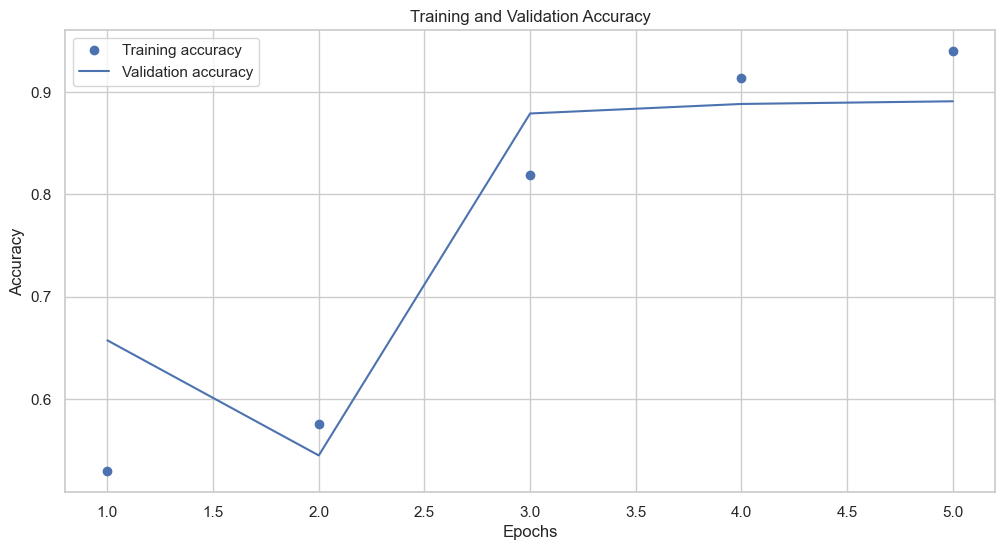

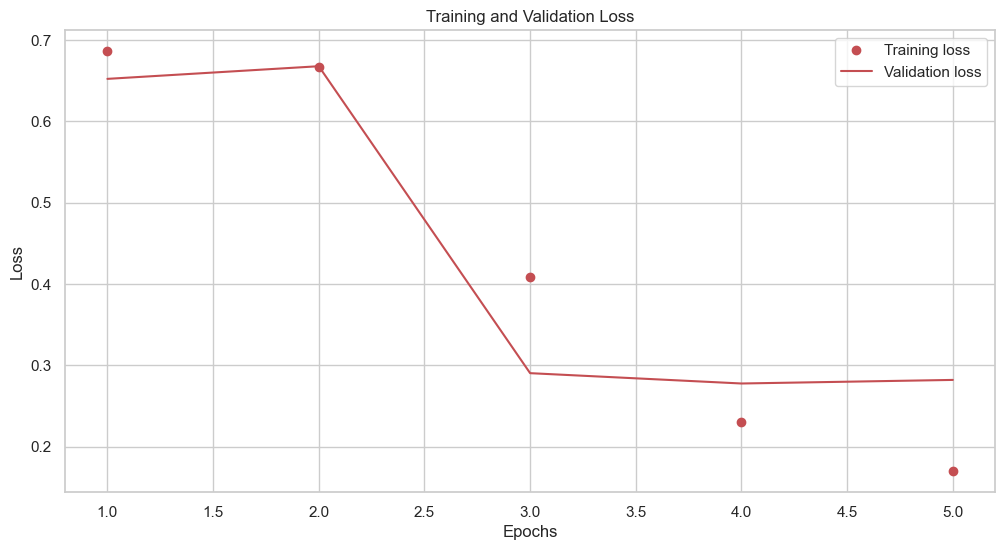

In [67]:
# We will use matplotlib to create our plots.
import matplotlib.pyplot as plt

# The 'history' object returned by model.fit() contains a dictionary
# holding the loss and accuracy values for both training and validation.
history_dict = history.history
print("Keys available in history object:", history_dict.keys())

# Let's extract the metrics from the history dictionary.
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# We need a range of numbers for the x-axis, which will represent the epochs.
# The number of epochs is simply the length of our accuracy/loss lists.
epochs = range(1, len(acc) + 1)

# --- Plot 1: Training and Validation Accuracy ---

# plt.figure() creates a new figure for plotting. figsize sets the width and height.
plt.figure(figsize=(12, 6))
# 'bo' creates a blue dot for each data point.
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# 'b' creates a solid blue line.
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.legend() displays the legend with the labels we provided.
plt.legend()
# plt.show() displays the plot.
plt.show()

# --- Plot 2: Training and Validation Loss ---

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [68]:

final_loss, final_accuracy = model.evaluate(X_test_padded, y_test_final, verbose=2)

# Let's print the results in a nicely formatted way.
print(f"\\nFinal LSTM Model Performance on Test Data:")
print(f"Loss: {final_loss:.4f}")
print(f"Accuracy: {final_accuracy:.4f} ({(final_accuracy * 100):.2f}%)")

313/313 - 7s - 22ms/step - accuracy: 0.8909 - loss: 0.2822
\nFinal LSTM Model Performance on Test Data:
Loss: 0.2822
Accuracy: 0.8909 (89.09%)


In [69]:
# 1. Get the raw probability predictions from the model.
# The output will be a 2D array of shape (10000, 1).
y_pred_probs = model.predict(X_test_padded)

# 2. Convert probabilities to binary class labels (0 or 1).

y_pred_lstm = [1 if prob > 0.5 else 0 for prob in y_pred_probs.flatten()]



313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


\n--- LSTM Model Classification Report ---
              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89      5000
    Positive       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

\n--- LSTM Model Confusion Matrix ---


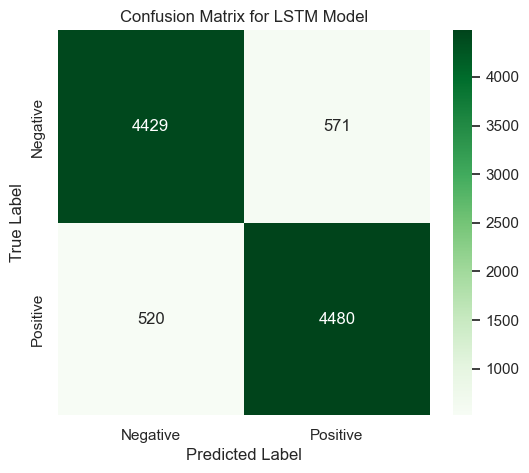

In [70]:
# We'll use the same functions we imported much earlier.
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# --- Classification Report ---
print("\\n--- LSTM Model Classification Report ---")
print(classification_report(y_test_final, y_pred_lstm, target_names=['Negative', 'Positive']))

# --- Confusion Matrix ---
print("\\n--- LSTM Model Confusion Matrix ---")
cm_lstm = confusion_matrix(y_test_final, y_pred_lstm)
class_names = ['Negative', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LSTM Model')
plt.show()

In [71]:
import joblib
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
print("TF-IDF vectorizer saved successfully")

TF-IDF vectorizer saved successfully
